<a href="https://colab.research.google.com/github/velizhask/PemrosesanBahasaAlami-nlp/blob/main/Statistical%20Language%20Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Statistical Language Models**

## Library

In [ ]:
import numpy as np
import pandas as pd
import string
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

**`N-Grams`**

N-gram adalah rangkaian N token (atau kata).

In [ ]:
# Contoh data teks
texts = [
    "I love programming with Python",
    "Python is great for data science",
    "I enjoy learning new things"
]

## Uni-gram

In [ ]:
uni_vectorizer = CountVectorizer(ngram_range=(1, 1))
uni_X = uni_vectorizer.fit_transform(texts)
print("Uni-gram:")
print(uni_vectorizer.get_feature_names_out())
print(uni_X.toarray())

Uni-gram:
['data' 'enjoy' 'for' 'great' 'is' 'learning' 'love' 'new' 'programming'
 'python' 'science' 'things' 'with']
[[0 0 0 0 0 0 1 0 1 1 0 0 1]
 [1 0 1 1 1 0 0 0 0 1 1 0 0]
 [0 1 0 0 0 1 0 1 0 0 0 1 0]]


## Bi-gram

In [ ]:
bi_vectorizer = CountVectorizer(ngram_range=(2, 2))
bi_X = bi_vectorizer.fit_transform(texts)
print("\nBi-gram:")
print(bi_vectorizer.get_feature_names_out())
print(bi_X.toarray())


Bi-gram:
['data science' 'enjoy learning' 'for data' 'great for' 'is great'
 'learning new' 'love programming' 'new things' 'programming with'
 'python is' 'with python']
[[0 0 0 0 0 0 1 0 1 0 1]
 [1 0 1 1 1 0 0 0 0 1 0]
 [0 1 0 0 0 1 0 1 0 0 0]]


## Tri-gram

In [ ]:
tri_vectorizer = CountVectorizer(ngram_range=(3, 3))
tri_X = tri_vectorizer.fit_transform(texts)
print("\nTri-gram:")
print(tri_vectorizer.get_feature_names_out())
print(tri_X.toarray())


Tri-gram:
['enjoy learning new' 'for data science' 'great for data' 'is great for'
 'learning new things' 'love programming with' 'programming with python'
 'python is great']
[[0 0 0 0 0 1 1 0]
 [0 1 1 1 0 0 0 1]
 [1 0 0 0 1 0 0 0]]


## Prediction

In [ ]:
# Menggabungkan teks menjadi satu string dan mengubahnya menjadi huruf kecil
all_text = " ".join(texts).lower()

# 2. Tokenisasi
tokens = nltk.word_tokenize(all_text)

# Membangun Bigram Model
bigrams = list(nltk.bigrams(tokens))
bigram_freq = Counter(bigrams)
unigram_freq = Counter(tokens)

# 3. Menghitung Probabilitas Bigram
def bigram_prob(word1, word2):
    if unigram_freq[word1] == 0:
        return 0
    return bigram_freq[(word1, word2)] / unigram_freq[word1]

# 4. Prediksi Kata Berikutnya
def predict_next(word):
    word = word.lower()  # Pastikan kata yang dicari juga dalam huruf kecil
    candidates = {bigram[1]: bigram_prob(word, bigram[1]) for bigram in bigram_freq if bigram[0] == word}
    if candidates:
        return max(candidates, key=candidates.get)
    return None

# Contoh penggunaan
print(predict_next("i"))  # Output kemungkinan: "love" atau "enjoy"

love


**TUGAS PRAKTIKUM**

Lakukan implemetasi menggunakan dataset masing-masing

# **Implementation to Dataset**

In [ ]:
!kaggle datasets download ucupsedaya/gojek-app-reviews-bahasa-indonesia
!unzip gojek-app-reviews-bahasa-indonesia.zip

Dataset URL: https://www.kaggle.com/datasets/ucupsedaya/gojek-app-reviews-bahasa-indonesia
License(s): other
 89% 7.00M/7.84M [00:00<00:00, 13.1MB/s]
100% 7.84M/7.84M [00:00<00:00, 10.2MB/s]
Archive:  gojek-app-reviews-bahasa-indonesia.zip
  inflating: GojekAppReviewV4.0.0-V4.9.3_Cleaned.csv  


In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('GojekAppReviewV4.0.0-V4.9.3_Cleaned.csv',encoding = "ISO-8859-1")
df.head()

,userName,content,score,at,appVersion
0,Yuga Edit,akun gopay saya di blok,1,2022-01-21 10:52:12,4.9.3
1,ff burik,Lambat sekali sekarang ini bosssku apk gojek g...,3,2021-11-30 15:40:38,4.9.3
2,Anisa Suci Rahmayuliani,Kenapa sih dari kemarin sy buka aplikasi gojek...,4,2021-11-29 22:58:12,4.9.3
3,naoki yakuza,Baru download gojek dan hape baru trus ditop u...,1,2022-09-03 15:21:17,4.9.3
4,Trio Sugianto,Mantap,5,2022-01-15 10:05:27,4.9.3


In [ ]:
# Mengambil hanya kolom 'review' dan 'rating'
df = df[['content', 'score']]
df

,content,score
0,akun gopay saya di blok,1
1,Lambat sekali sekarang ini bosssku apk gojek g...,3
2,Kenapa sih dari kemarin sy buka aplikasi gojek...,4
3,Baru download gojek dan hape baru trus ditop u...,1
4,Mantap,5
...,...,...
224997,Gofood Biaya lain2ya gak ngotak mending hujan2...,1
224998,Yok lah,5
224999,Sempurna,5
225000,GOJEK LAMA LAMA GAK JELAS LAGI PESEN MASA MAP...,1


In [ ]:
pd.reset_option('display.max_colwidth')
df = df.dropna()
df = df.drop_duplicates()
df

,content,score
0,akun gopay saya di blok,1
1,Lambat sekali sekarang ini bosssku apk gojek g...,3
2,Kenapa sih dari kemarin sy buka aplikasi gojek...,4
3,Baru download gojek dan hape baru trus ditop u...,1
4,Mantap,5
...,...,...
224989,Makin kesini makin mahal dan voucher2nya makin...,5
224991,Kenapa harus perbaruan mulu hedeh payah,1
224997,Gofood Biaya lain2ya gak ngotak mending hujan2...,1
224998,Yok lah,5


In [ ]:
# Fungsi untuk membersihkan teks
def clean_text(text):
    text = text.lower()  # Konversi ke huruf kecil
    text = re.sub(r'[^\w\s]', '', text)  # Hapus tanda baca
    text = re.sub(r'\d+', '', text)  # Hapus angka
    text = re.sub(r'(.)\1{1,}', r'\1', text)  # Hapus karakter berulang lebih dari 2 kali
    return text

df['prepocess_text'] = df['content'].apply(clean_text)

# Mendapatkan daftar stopwords dalam bahasa Indonesia
sw = stopwords.words('indonesian')

# Fungsi untuk menghapus stopwords dari token-token kata
def remove_stopwords(tokens):
    tokens = [word for word in tokens if word not in sw and word not in string.punctuation]
    return tokens

# Inisialisasi lemmatizer dan stemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

# Fungsi untuk melakukan preprocessing pada teks (lemmatization dan stemming)
def preprocess_text(text):
    # Tokenisasi teks
    tokens = word_tokenize(text)

    # Menghapus stopwords
    tokens = remove_stopwords(tokens)

    # Lemmatization
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Stemming
    stemmed_tokens = [stemmer.stem(word) for word in lemmatized_tokens]

    # Menggabungkan token yang sudah diproses menjadi satu string kembali
    return ' '.join(stemmed_tokens)

# Contoh penerapan preprocess_text pada kolom 'content'
df['prepocess_text'] = df['content'].apply(preprocess_text)
df.head()

,content,score,prepocess_text
0,akun gopay saya di blok,1,akun gopay blok
1,Lambat sekali sekarang ini bosssku apk gojek g...,3,lambat bosssku apk gojek gk kaya
2,Kenapa sih dari kemarin sy buka aplikasi gojek...,4,kenapa sih kemarin sy buka aplikasi gojek saya...
3,Baru download gojek dan hape baru trus ditop u...,1,baru download gojek hape tru ditop u gopay tra...
4,Mantap,5,mantap


========================

In [ ]:
# Install library yang diperlukan (jika belum terpasang)
!pip install beautifulsoup4 requests

In [ ]:
import requests
from bs4 import BeautifulSoup

# URL pencarian untuk artikel tentang "pilkada"
url = 'https://www.kompas.com/tag/pilkada'

# Melakukan request ke halaman pencarian Kompas
response = requests.get(url)

# Memastikan bahwa request berhasil
if response.status_code == 200:
    # Parsing HTML dari halaman pencarian
    soup = BeautifulSoup(response.content, 'html.parser')

    # Menyimpan hasil artikel yang diambil
    articles = []

    # Mengambil semua elemen artikel hasil pencarian
    for item in soup.find_all('a', class_='article__link'):
        title = item.get_text().strip()  # Mengambil judul artikel
        link = item['href']  # Mengambil tautan artikel
        articles.append({'title': title, 'link': link})

    # Menampilkan hasil crawling
    if articles:
        print(f"Menemukan {len(articles)} artikel tentang Pilkada:\n")
        for i, article in enumerate(articles, 1):
            print(f"{i}. {article['title']}")
            print(f"   Link: {article['link']}\n")
    else:
        print("Tidak ada artikel yang ditemukan.")
else:
    print("Failed to retrieve the page")


Menemukan 20 artikel tentang Pilkada:

1. Tim Bobby Nasution Bantah Lempari Rombongan Edy Rahmayadi Usai Debat Pilkada Sumut
   Link: http://medan.kompas.com/read/2024/11/07/160050478/tim-bobby-nasution-bantah-lempari-rombongan-edy-rahmayadi-usai-debat-pilkada

2. Ziarah ke Makam Sunan Giri, Risma Dicurhati Tukang Ojek
   Link: http://regional.kompas.com/read/2024/11/07/155541378/ziarah-ke-makam-sunan-giri-risma-dicurhati-tukang-ojek

3. BSSN Sebut "Ransomware" Masih Jadi Ancaman pada Pilkada Serentak 2024
   Link: http://nasional.kompas.com/read/2024/11/07/15542671/bssn-sebut-ransomware-masih-jadi-ancaman-pada-pilkada-serentak-2024

4. Ratusan Surat Suara Pilkada Jember Rusak, Begini Kata KPU
   Link: http://surabaya.kompas.com/read/2024/11/07/154940178/ratusan-surat-suara-pilkada-jember-rusak-begini-kata-kpu

5. BSSN Sebut Selalu Berkoordinasi Saat KPU Mengembangkan Sirekap
   Link: http://nasional.kompas.com/read/2024/11/07/15413141/bssn-sebut-selalu-berkoordinasi-saat-kpu-mengemban

In [ ]:
import csv
import pandas as pd

# Simpan hasil crawling ke file CSV
with open('hasil_crawling_pilkada.csv', mode='w', newline='') as file:
    writer = csv.DictWriter(file, fieldnames=['title', 'link'])
    writer.writeheader()  # Menulis header kolom
    writer.writerows(articles)  # Menulis data artikel

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL halaman yang ingin dicrawl
url = 'http://regional.kompas.com/read/2024/09/20/070510078/kpu-tetapkan-dpt-pilkada-sumbawa-374351-pemilih'

# Mengirim request ke URL dan mendapatkan halaman HTML
response = requests.get(url)

# Mengecek status code untuk memastikan permintaan berhasil
if response.status_code == 200:
    print("Berhasil mengambil halaman")
else:
    print(f"Gagal mengambil halaman. Status code: {response.status_code}")

# Parsing HTML menggunakan BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Mengambil judul artikel
judul = soup.find('h1', class_='read__title').get_text(strip=True)

# Mengambil tanggal publikasi artikel
tanggal = soup.find('div', class_='read__time').get_text(strip=True)

# Mengambil isi artikel
paragraf_list = soup.find_all('p')
isi_artikel = "\n".join([paragraf.get_text(strip=True) for paragraf in paragraf_list])

# Menampilkan hasil scraping
print(f"Judul: {judul}")
print(f"Tanggal Publikasi: {tanggal}")
print(f"Isi Artikel: \n{isi_artikel}")

# Misalkan Anda memiliki DataFrame df yang sudah ada
df = pd.DataFrame({'content': [isi_artikel]})  # Membuat DataFrame baru hanya untuk contoh

Berhasil mengambil halaman
Judul: KPU Tetapkan DPT Pilkada Sumbawa 374.351 Pemilih
Tanggal Publikasi: Kompas.com- 20/09/2024, 07:05 WIB
Isi Artikel: 
KPU Tetapkan DPT Pilkada Sumbawa 374.351 Pemilih
Tim Redaksi
KOMPAS.com- Komisi Pemilihan Umum (KPU) Kabupaten Sumbawa, Nusa Tenggara Barat (NTB) menetapkan daftar pemilih tetap (DPT) Pilkada 2024 sebanyak 374.351 pemilih.
Hal itu disampaikan dalam rapat pleno terbuka rekapitulasi dan penetapan daftar pemilih tetap (DPT) tingkat Kabupaten pada pemilihan Gubernur dan Wakil Gubernur Nusa Tenggara Barat (NTB) dan pemilihan Bupati dan Wakil Bupati Sumbawa tahun 2024.
Kegiatan berlangsung di Hotel Sernu, Kamis (19/09/2024), dihadiri Sekda Sumbawa, Kapolres, Dandim, Komisioner KPU NTB, Ketua dan AnggotaKPU Sumbawa, Komisoner Bawaslu Sumbawa.
Baca juga:4 Paslon Bupati-Wakil Bupati Lolos Tes Kesehatan, Pilkada Sumbawa Bakal Menarik
Selain itu ada Kepala Dukcapil, penghubung bakal pasangan calon gubernur/wakil gubernur NTB, penghubung bakal pasang

In [ ]:
df

,content
0,KPU Tetapkan DPT Pilkada Sumbawa 374.351 Pemil...


In [ ]:
# Asumsikan df sudah ada dan preprocessing sudah dilakukan
text_data = df['content'].tolist()

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_data)
total_words = len(tokenizer.word_index) + 1

# Create input sequences
input_sequences = []
for line in text_data:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# Pad sequences and split into predictors and label
max_sequence_len = max([len(seq) for seq in input_sequences])
input_sequences = np.array(pad_sequences(
    input_sequences, maxlen=max_sequence_len, padding='pre'))
X, y = input_sequences[:, :-1], input_sequences[:, -1]

# Convert target data to one-hot encoding
y = tf.keras.utils.to_categorical(y, num_classes=total_words)

In [ ]:
# Define the model
model = Sequential()
model.add(Embedding(total_words, 10,
					input_length=max_sequence_len-1))
model.add(LSTM(128))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy',
			optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Train the model
model.fit(X, y, epochs=50, verbose=1)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 11s 674ms/step - accuracy: 0.0086 - loss: 5.2415
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 419ms/step - accuracy: 0.0373 - loss: 5.2134
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 518ms/step - accuracy: 0.0160 - loss: 5.0617
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 419ms/step - accuracy: 0.0393 - loss: 5.0083
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 596ms/step - accuracy: 0.0271 - loss: 4.9347
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 502ms/step - accuracy: 0.0173 - loss: 4.9930
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 11s 654ms/step - accuracy: 0.0427 - loss: 4.9339
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 415ms/step - accuracy: 0.0322 - loss: 4.9178
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 10s 424ms/step - accuracy: 0.0490 - loss: 4.9582
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 417ms/step - accuracy: 0.0265 - loss: 4.8400
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 649ms/step - accuracy: 0.0350 - loss: 4.9410
Epoch 12/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 422ms/s

In [ ]:
# Generate next word predictions
seed_text = "pasangan"
next_words = 5

for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences(
		[token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted_probs = model.predict(token_list)
	predicted_word = tokenizer.index_word[np.argmax(predicted_probs)]
	seed_text += " " + predicted_word

print("Next predicted words:", seed_text)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
Next predicted words: pasangan sumbawa sumbawa sumbawa sumbawa sumbawa


=================

In [ ]:
# Fungsi untuk membuat n-gram
def generate_ngrams(text, n):
    tokens = nltk.word_tokenize(text)
    return [" ".join(tokens[i:i+n]) for i in range(len(tokens)-n+1)]

# Menyimpan hasil n-gram untuk setiap baris
df['unigram'] = df['prepocess_text'].apply(lambda x: generate_ngrams(x, 1))
df['bigram'] = df['prepocess_text'].apply(lambda x: generate_ngrams(x, 2))
df['trigram'] = df['prepocess_text'].apply(lambda x: generate_ngrams(x, 3))
df['four_gram'] = df['prepocess_text'].apply(lambda x: generate_ngrams(x, 4))

df.head()

,content,score,prepocess_text,unigram,bigram,trigram,four_gram
0,akun gopay saya di blok,1,akun gopay blok,"[akun, gopay, blok]","[akun gopay, gopay blok]",[akun gopay blok],[]
1,Lambat sekali sekarang ini bosssku apk gojek g...,3,lambat bosssku apk gojek gk kaya,"[lambat, bosssku, apk, gojek, gk, kaya]","[lambat bosssku, bosssku apk, apk gojek, gojek...","[lambat bosssku apk, bosssku apk gojek, apk go...","[lambat bosssku apk gojek, bosssku apk gojek g..."
2,Kenapa sih dari kemarin sy buka aplikasi gojek...,4,kenapa sih kemarin sy buka aplikasi gojek saya...,"[kenapa, sih, kemarin, sy, buka, aplikasi, goj...","[kenapa sih, sih kemarin, kemarin sy, sy buka,...","[kenapa sih kemarin, sih kemarin sy, kemarin s...","[kenapa sih kemarin sy, sih kemarin sy buka, k..."
3,Baru download gojek dan hape baru trus ditop u...,1,baru download gojek hape tru ditop u gopay tra...,"[baru, download, gojek, hape, tru, ditop, u, g...","[baru download, download gojek, gojek hape, ha...","[baru download gojek, download gojek hape, goj...","[baru download gojek hape, download gojek hape..."
4,Mantap,5,mantap,[mantap],[],[],[]


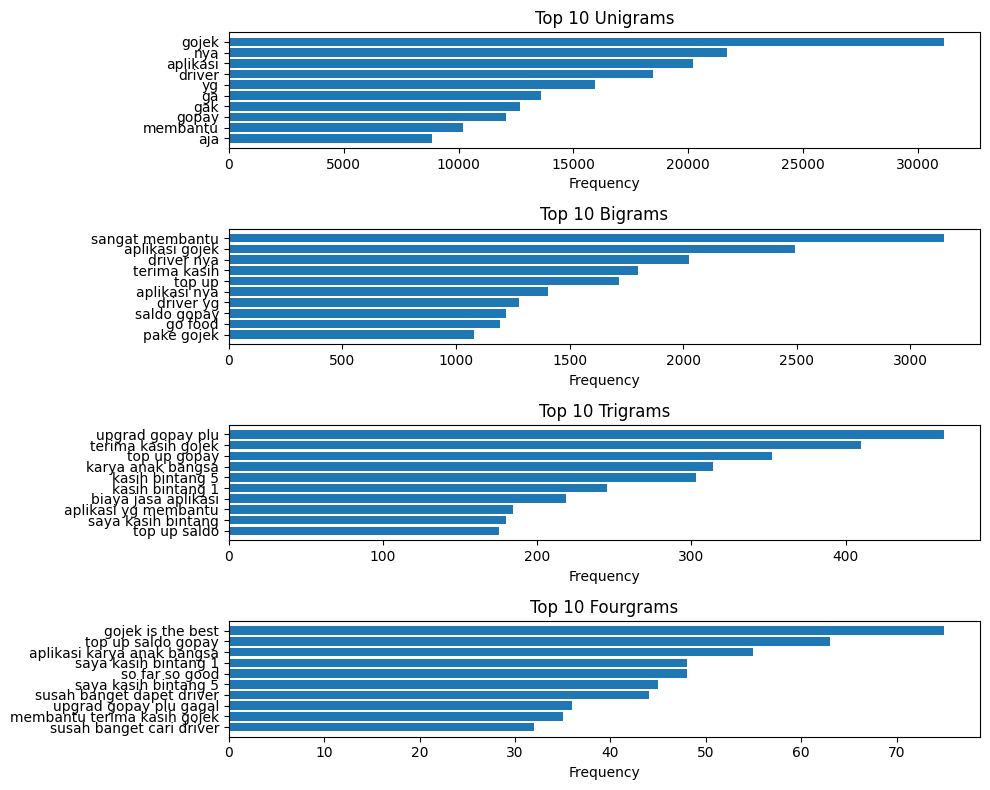

In [ ]:
# Menghitung frekuensi unigram, bigram, trigram, dan fourgram
unigram_counts = Counter([item for sublist in df['unigram'] for item in sublist])
bigram_counts = Counter([item for sublist in df['bigram'] for item in sublist])
trigram_counts = Counter([item for sublist in df['trigram'] for item in sublist])
fourgram_counts = Counter([item for sublist in df['four_gram'] for item in sublist])

# Fungsi untuk memvisualisasikan n-gram
def plot_ngram(counts, title):
    top_n = counts.most_common(10)
    words, freqs = zip(*top_n)
    plt.barh(words, freqs)
    plt.xlabel("Frequency")
    plt.title(title)
    plt.gca().invert_yaxis()

# Visualisasi Unigram, Bigram, Trigram, dan Fourgram
plt.figure(figsize=(10, 8))

plt.subplot(4, 1, 1)
plot_ngram(unigram_counts, "Top 10 Unigrams")

plt.subplot(4, 1, 2)
plot_ngram(bigram_counts, "Top 10 Bigrams")

plt.subplot(4, 1, 3)
plot_ngram(trigram_counts, "Top 10 Trigrams")

plt.subplot(4, 1, 4)
plot_ngram(fourgram_counts, "Top 10 Fourgrams")

plt.tight_layout()
plt.show()

In [ ]:
# Menggunakan CountVectorizer untuk membuat bigram
vectorizer = CountVectorizer(ngram_range=(2, 2))  # bigram
X = vectorizer.fit_transform(df['prepocess_text'])
print("Bigram Feature Matrix:\n", X.toarray())

Bigram Feature Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
# Fungsi untuk menghitung probabilitas bigram
def bigram_probability(word1, word2):
    if unigram_counts[word1] == 0:
        return 0
    return bigram_counts[(word1, word2)] / unigram_counts[word1]

# Fungsi untuk memprediksi kata berikutnya
def predict_next_word(word):
    candidates = {bigram.split()[1]: bigram_probability(word, bigram.split()[1]) for bigram in bigram_counts if bigram.startswith(word + " ")}
    if candidates:
        return max(candidates, key=candidates.get)
    return None

# Contoh penggunaan prediksi
input_word = "sangat"  # Ganti dengan kata yang ingin diprediksi
predicted_word = predict_next_word(input_word)
print(f"Kata berikutnya setelah '{input_word}':", predicted_word)

Kata berikutnya setelah 'sangat': membantu


In [ ]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.5 MB/s eta 0:00:00


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER lexicon jika belum diunduh
nltk.download('vader_lexicon')

# Inisialisasi VADER
sia = SentimentIntensityAnalyzer()

# Fungsi untuk mendapatkan label sentimen dari skor VADER
def analyze_sentimentvader(text):
    scores = sia.polarity_scores(text)
    compound = scores['compound']
    if compound >= 0.05:
        return 'positive'
    elif compound > -0.05 and compound < 0.05:
        return 'neutral'
    else:
        return 'negative'

# Menerapkan sentimen analisis pada kolom prepoccess_review
df['sentiment_vader'] = df['prepocess_text'].apply(analyze_sentimentvader)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
df.head()

,content,score,prepocess_text,unigram,bigram,trigram,four_gram,sentiment_vader
0,akun gopay saya di blok,1,akun gopay blok,"[akun, gopay, blok]","[akun gopay, gopay blok]",[akun gopay blok],[],neutral
1,Lambat sekali sekarang ini bosssku apk gojek g...,3,lambat bosssku apk gojek gk kaya,"[lambat, bosssku, apk, gojek, gk, kaya]","[lambat bosssku, bosssku apk, apk gojek, gojek...","[lambat bosssku apk, bosssku apk gojek, apk go...","[lambat bosssku apk gojek, bosssku apk gojek g...",neutral
2,Kenapa sih dari kemarin sy buka aplikasi gojek...,4,kenapa sih kemarin sy buka aplikasi gojek saya...,"[kenapa, sih, kemarin, sy, buka, aplikasi, goj...","[kenapa sih, sih kemarin, kemarin sy, sy buka,...","[kenapa sih kemarin, sih kemarin sy, kemarin s...","[kenapa sih kemarin sy, sih kemarin sy buka, k...",neutral
3,Baru download gojek dan hape baru trus ditop u...,1,baru download gojek hape tru ditop u gopay tra...,"[baru, download, gojek, hape, tru, ditop, u, g...","[baru download, download gojek, gojek hape, ha...","[baru download gojek, download gojek hape, goj...","[baru download gojek hape, download gojek hape...",neutral
4,Mantap,5,mantap,[mantap],[],[],[],neutral


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Ekstraksi fitur menggunakan CountVectorizer dengan n-gram (bigram)
vectorizer = CountVectorizer(ngram_range=(1, 2))  # Menggunakan unigram dan bigram
X = vectorizer.fit_transform(df['prepocess_text'])
y = df['sentiment_vader']

# Membagi dataset menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Membangun model klasifikasi menggunakan Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Memprediksi label untuk data pengujian
y_pred = model.predict(X_test)

In [ ]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Menampilkan hasil evaluasi
print(f"Akurasi: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Akurasi: 0.99
Confusion Matrix:
 [[ 1070   130    19]
 [    5 24728     3]
 [   14   180  2052]]
Classification Report:
               precision    recall  f1-score   support

    negative       0.98      0.88      0.93      1219
     neutral       0.99      1.00      0.99     24736
    positive       0.99      0.91      0.95      2246

    accuracy                           0.99     28201
   macro avg       0.99      0.93      0.96     28201
weighted avg       0.99      0.99      0.99     28201

